# **<center>Sentiment Analysis of Financial News Using NLTK and Classification model</center>**

## **Problem statment:**
* We have to predict the sentiment of fiancial news using nltk

## **About Dataset**
* This dataset contains 3 csv file
  * cnbc headline   (3080, 3)
  * gaurdian headline   (17800, 2)
  * reuters headline   (32770, 3)


## **Columns Provided in the Dataset**

* **cnbc headline**
  1. time
  2. headlines
  3. Description

* **gaurdian headline**
  1. time
  2. headline

* **reuters headline**
  1. time
  2. headline
  3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import all the required libraries 
import re
import pandas as pd
import numpy as np
import os
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import string
!pip install emoji
import emoji
pd.set_option('display.max_rows',500)
import warnings
warnings.filterwarnings("ignore")
#import stopwords and text processing libraries
from collections import Counter
import string
import unicodedata
import nltk
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import  TfidfVectorizer 
from sklearn.decomposition import NMF
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [3]:
#import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Basic EDA on cnbc_headlines dataset**

**Read csv file of cnbc headlines using pandas**

In [4]:
df_cnbc = pd.read_csv('/content/drive/MyDrive/Projects/Sentiment Analysis of Financial News/cnbc_headlines.csv')
df_cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


**Check the shape of cnbc headline dataset**

In [5]:
df_cnbc.shape

(3080, 3)

**Check all the columns in the cnbc headline dataset**

In [6]:
df_cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

**Check which columns are having categorical, numerical or boolean values**

In [7]:
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


**Check for missing values in all the columnns of cnbc headline dataset**

In [8]:
df_cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

**Observation:**
* There is 280 missing values in headlines, description and time

**Drop nan values in cnbc headline dataset**

In [9]:
df_cnbc.dropna(inplace = True)

**Drop the duplicate rows in the dataset keep the first one**

In [10]:
df_cnbc.drop_duplicates(keep = 'first', inplace=True)

**Check the shape of cnbc headline dataset**

In [11]:
df_cnbc.shape

(2800, 3)

**Reset index**

In [12]:
df_cnbc.reset_index(drop = True, inplace = True)

# **Basic EDA on Gaurdian headlines dataset**

**Read csv file of gaurdian headlines using pandas**

In [13]:
df_guardian = pd.read_csv('/content/drive/MyDrive/Projects/Sentiment Analysis of Financial News/guardian_headlines.csv')
df_guardian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


**Check the shape of gaurdian headline dataset**

In [14]:
df_guardian.shape

(17800, 2)

**Check columns of gaurdian headline**

In [15]:
df_guardian.columns

Index(['Time', 'Headlines'], dtype='object')

**Check which columns are having categorical, numerical or boolean values**

In [16]:
df_guardian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


**Check null values in gaurdian headlines dataset**

In [17]:
df_guardian.isnull().sum()

Time         0
Headlines    0
dtype: int64

**Drop duplicate rows in headlines and keep the first one**

In [18]:
df_guardian.drop_duplicates(keep = 'first', inplace = True)

**Reset index**

In [19]:
df_guardian.reset_index(drop = True, inplace = True)

# **Basic EDA on reuters headlines**

**Read csv file of reuters headlines using using pandas**

In [20]:
df_reuters = pd.read_csv('/content/drive/MyDrive/Projects/Sentiment Analysis of Financial News/reuters_headlines.csv')
df_reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


**Check the shape of reuters headlines dataset**

In [21]:
df_reuters.shape

(32770, 3)

**Check the columns of reuters headline dataset**

In [22]:
df_reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

**Check which columns are having categorical, numerical or boolean values**

In [23]:
df_reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


**Check for missing values in all the columnns of reuters headlines dataset**

In [24]:
df_reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

**Drop the duplicate rows in reuters headlines dataset and keep the first one**

In [25]:
df_reuters.drop_duplicates(keep ='first', inplace = True)

In [26]:
df_reuters.reset_index(drop = True, inplace = True)

# **SENTIMENT ANAYSIS**

## **Making some functions that we will need  ahead**

### **Preprocessing** 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

**Create a function for preprocessing**

In [27]:
def preprocess(x):
  #convert all to lowercase
  x = x.lower()
  #remove puntuations
  remove_punct = str.maketrans('', '', string.punctuation)
  x = x.translate(remove_punct)
  #remove stopword
  stopwordslist = stopwords.words('english')
  tokens = word_tokenize(x)
  result = [w for w in tokens if not w in stopwordslist] 

  #stemming
  ps = PorterStemmer()
  stemwords = [ps.stem(w) for w in result]
  
  #lemmitizing
  lemmatizer = WordNetLemmatizer()
  lemmawords = [lemmatizer.lemmatize(w) for w in stemwords]
  
  return ( " ".join(lemmawords))
  

**Import sentiment intensity analyzer**
  * https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [28]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# create sentiment intensity analyzer object
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Create fuction to  decide sentiment as positive, negative and neutral**

In [29]:
def polarity(a):
 return sid.polarity_scores(a)['compound']

# **Working with description of cnbc and reuters datasets**


**Concatenate cnbc headlines dataset and reuters headline dataset**

In [30]:
df_concatened_d = pd.concat([df_cnbc, df_reuters], axis = 0)

**Check the shape of this new dataset**

In [31]:
df_concatened_d.shape

(35515, 3)

**Make a copy of new dataset**

In [32]:
df_concatened_d_copy = df_concatened_d.copy()

**Apply preprocessing to the description of new dataset**

In [33]:
df_concatened_d['Description'] = df_concatened_d['Description'].apply(lambda x : preprocess(x))

**Analyze polarity score of values in description and  add new column of it in dataset**

In [34]:
df_concatened_d['ds_score'] = df_concatened_d['Description'].apply(lambda x: polarity(x))

**Create a function which will assign sentiment based on polarity score**

In [35]:
def assign_sentiment(x):
  if x > 0:
    return 'Positive'
  if x < 0:
    return 'Negative'
  if x == 0:
    return 'Neutral'

**Apply the function  which decides sentiment to  polarity score column**

In [36]:
df_concatened_d['ds_score'] = df_concatened_d['ds_score'].apply(lambda x : assign_sentiment(x))

In [ ]:
df_concatened_d.head()

**Plot a count plot on description score column**

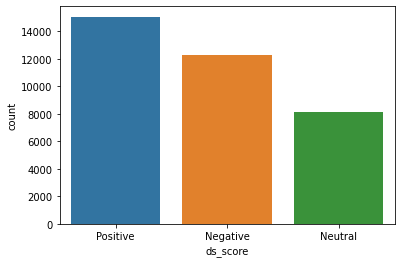

In [37]:
sns.countplot(df_concatened_d['ds_score'])

**Observation:**
* Descriptions contains approximately:
  * 14000 positive statment
  * 12000 negative statment
  * 8000 neutral statment

**Plot a pie plot on description score column**

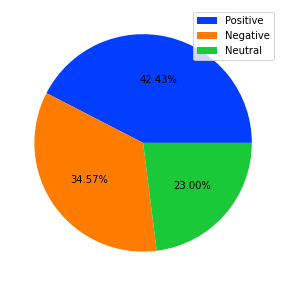

In [38]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_d['ds_score'].value_counts(normalize = True), autopct='%.2f%%', colors=palette_color)
plt.legend(['Positive', 'Negative', 'Neutral'])

# displaying chart
plt.show()

**Observation:**
* Descriptions contains:
  * 42.43 % positive statments
  * 34.57 % negtive statements
  * 23.00 % neutral statments

### **Spliting in Independent and Dependent Features**

In [39]:
X = df_concatened_d['Description']
y = df_concatened_d['ds_score']

### **Train test split**
* Split the dataset  into test and train 
* 90% train , 10% test and random state 212

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

## **Modelling on description of cnbc headlines dataset and reuters headline dataset on datasets** 

In [41]:
'''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),xg.XGBClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
8 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}

map_keys = list(models.keys())

In [42]:
def get_model_building_technique_name(num):
  if num == 1:
    return 'LinearSVC'
  if num == 2:
    return 'LogisticRegression'
  if num == 3:
    return 'MultinomialNB'
  if num == 4:
    return 'BernoulliNB'
  if num == 5:
    return 'GradientBoostingClassifier'
  if num == 6:
    return 'XGBClassifier'
  if num == 7:
    return 'DecisionTreeClassifier'
  if num == 8:
    return 'KNeighborsClassifier'
  return ''
     

In [43]:
results = [];
for key_index in range(len(map_keys)):
  try:
    key = map_keys[key_index]
    model = models[key]
    print(key)
    model.fit(X_train, y_train)

    '''Test Accuracy'''
    y_pred = model.predict(X_test)

    Accuracy_Test = accuracy_score(y_test, y_pred)
    conf_mat_Test = confusion_matrix(y_test, y_pred)
    true_positive_Test = conf_mat_Test[0][0]
    false_positive_Test = conf_mat_Test[0][1]
    false_negative_Test = conf_mat_Test[1][0]
    true_negative__Test = conf_mat_Test[1][1]
    Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
    Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
    F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
    # AUC_Test = roc_auc_score(y_test, y_pred)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train = accuracy_score(y_train, y_pred_train)
    conf_mat_Train = confusion_matrix(y_train, y_pred_train)
    true_positive_Train = conf_mat_Train[0][0]
    false_positive_Train = conf_mat_Train[0][1]
    false_negative_Train = conf_mat_Train[1][0]
    true_negative__Train = conf_mat_Train[1][1]
    Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
    Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
    F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
    # AUC_Train = roc_auc_score(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test, 
        'F1_Score_Test' : F1_Score_Test, 
        # 'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train, 
        'F1_Score_Train' : F1_Score_Train 
        # 'AUC_Train' : AUC_Train
        })
  except:
    print('Error')

1
2
3
4
5
6
7
8


In [44]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.932151,0.961407,0.981611,0.971404,0.987141,0.997710,0.992799,0.995248,0.023844
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.894426,0.932921,0.967949,0.950112,0.953415,0.975596,0.986419,0.980978,0.030865
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.639921,0.990196,0.843424,0.910936,0.716516,0.994617,0.871009,0.928718,0.017783
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.739302,0.942564,0.871090,0.905419,0.827019,0.960318,0.919350,0.939388,0.033969
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.842061,0.842644,0.989071,0.910005,0.846573,0.844690,0.992226,0.912534,0.002528
5,XGBClassifier,"(CountVectorizer(), TfidfTransformer(), XGBCla...",0.802646,0.802669,0.987104,0.885384,0.809843,0.811252,0.992166,0.892635,0.007251
6,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.877252,0.979808,0.989320,0.984541,1.000000,1.000000,1.000000,1.000000,0.015459
7,KNeighborsClassifier,"(CountVectorizer(), TfidfTransformer(), KNeigh...",0.550957,0.827586,0.761194,0.793003,0.707599,0.900781,0.837077,0.867761,0.074759


**Save best model**

In [45]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_d.sav', 'wb') as best_model_pickle:
 pickle.dump(Best_Model_Name, best_model_pickle)

### **Working with test dataset**

**Perforn the prediction on the test dataset**

In [46]:
loaded_model_cr = pickle.load(open('financial_news_model_d.sav', 'rb'))
result = loaded_model_cr.predict(X_test)
pd.DataFrame(result)

,0
0,Negative
1,Neutral
2,Neutral
3,Positive
4,Neutral
...,...
3547,Negative
3548,Positive
3549,Neutral
3550,Positive


# **Working with headlines + description  of cnbc and reuters datasets**

**Creating copy of orifioriginalngal**

In [47]:
df_concatened_d_copied = df_concatened_d.copy()

**Merge headlines and description of new dataset and name it info**

In [48]:
df_concatened_d['info'] = df_concatened_d['Headlines'] + ' ' + df_concatened_d['Description']

**Only keep info and time column . drop all remaining columns**

In [49]:
df_concatened_d.drop(['Headlines', 'Description', 'ds_score'], axis = 1, inplace = True)

**Apply preprocessing on info column**

In [50]:
df_concatened_d['info'] = df_concatened_d['info'].apply(lambda x : preprocess(x))

**Analyze polarity score of values in info and  add new column of it in dataset**

In [51]:
df_concatened_d['ds_score_info'] = df_concatened_d['info'].apply(lambda x: polarity(x))

**Apply the function  which decides sentiment to  polarity score column**

In [52]:
df_concatened_d['ds_score_info'] = df_concatened_d['ds_score_info'].apply(lambda x : assign_sentiment(x))

In [ ]:
df_concatened_d.head()

**Create a count plot on info_score column**

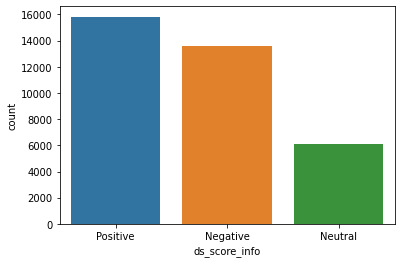

In [53]:
sns.countplot(df_concatened_d['ds_score_info'])

**Observation:**
* Headlines & Descriptions contains approximatley:
  * 15500 positive statment
  * 13000 negative statment
  * 6500 neutral statment

**Create a  pie chart on info_score column**  

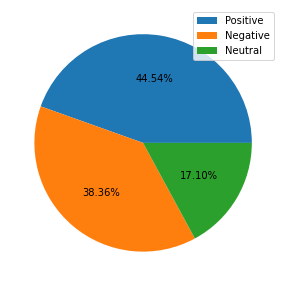

In [54]:
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_d['ds_score_info'].value_counts(normalize = True), autopct='%.2f%%')
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying chart
plt.show()

**Observation:**
* Headlines & Descriptions contains:
  * 44.5 % positive statments
  * 38.36 % negtive statements
  * 17.10 % neutral statments

### **Spliting in Independent and Dependent Features**

In [55]:
X = df_concatened_d['info']
y = df_concatened_d['ds_score_info']

### **Train test split**
* Split the dataset  into test and train 
* 90% train , 10% test and random state 212

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

## **Modelling on headlines + description of cnbc and reuters datasets** 

In [57]:
'''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),xg.XGBClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
8 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}

map_keys = list(models.keys())

In [58]:
def get_model_building_technique_name(num):
  if num == 1:
    return 'LinearSVC'
  if num == 2:
    return 'LogisticRegression'
  if num == 3:
    return 'MultinomialNB'
  if num == 4:
    return 'BernoulliNB'
  if num == 5:
    return 'GradientBoostingClassifier'
  if num == 6:
    return 'XGBClassifier'
  if num == 7:
    return 'DecisionTreeClassifier'
  if num == 8:
    return 'KNeighborsClassifier'
  return ''
     

In [59]:
results = [];
for key_index in range(len(map_keys)):
  try:
    key = map_keys[key_index]
    model = models[key]
    print(key)
    model.fit(X_train, y_train)

    '''Test Accuracy'''
    y_pred = model.predict(X_test)

    Accuracy_Test = accuracy_score(y_test, y_pred)
    conf_mat_Test = confusion_matrix(y_test, y_pred)
    true_positive_Test = conf_mat_Test[0][0]
    false_positive_Test = conf_mat_Test[0][1]
    false_negative_Test = conf_mat_Test[1][0]
    true_negative__Test = conf_mat_Test[1][1]
    Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
    Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
    F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
    # AUC_Test = roc_auc_score(y_test, y_pred)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train = accuracy_score(y_train, y_pred_train)
    conf_mat_Train = confusion_matrix(y_train, y_pred_train)
    true_positive_Train = conf_mat_Train[0][0]
    false_positive_Train = conf_mat_Train[0][1]
    false_negative_Train = conf_mat_Train[1][0]
    true_negative__Train = conf_mat_Train[1][1]
    Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
    Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
    F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
    # AUC_Train = roc_auc_score(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test, 
        'F1_Score_Test' : F1_Score_Test, 
        # 'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train, 
        'F1_Score_Train' : F1_Score_Train 
        # 'AUC_Train' : AUC_Train
        })
  except:
    print('Error')

1
2
3
4
5
6
7
8


In [60]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.901464,0.961875,0.968026,0.964940,0.983950,0.998019,0.993263,0.995635,0.030695
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.870777,0.963533,0.936220,0.949681,0.939868,0.985091,0.975645,0.980345,0.030665
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.668919,1.000000,0.855864,0.922335,0.717486,0.999682,0.867905,0.929145,0.006810
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.719313,0.955366,0.878603,0.915378,0.811032,0.968690,0.929815,0.948855,0.033477
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.720439,0.975075,0.995927,0.985390,0.738979,0.983230,0.992881,0.988032,0.002642
5,XGBClassifier,"(CountVectorizer(), TfidfTransformer(), XGBCla...",0.684403,1.000000,0.995722,0.997856,0.692207,1.000000,0.992188,0.996079,0.001778
6,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.834741,0.970776,0.980627,0.975677,1.000000,1.000000,1.000000,1.000000,0.024323
7,KNeighborsClassifier,"(CountVectorizer(), TfidfTransformer(), KNeigh...",0.562218,0.881373,0.798401,0.837838,0.703407,0.937659,0.850832,0.892138,0.054300


**Save Best Model**

In [61]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_hd.sav', 'wb') as best_model_pickle:
 pickle.dump(Best_Model_Name, best_model_pickle)

### **Working with test dataset**

**Perforn the prediction on the test dataset**

In [62]:
# Perforn the prediction on the test dataset
best_model_hd = pickle.load(open('financial_news_model_hd.sav', 'rb'))
result = best_model_hd.predict(X_test)
pd.DataFrame(result)

,0
0,Negative
1,Positive
2,Positive
3,Positive
4,Positive
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


# **Working on headlines of cnbc, reuters and guardian datasets**

**From the dataset you have copied before delete the column of description**

In [63]:
df_concatened_d_copied = df_concatened_d_copied.drop(['Description'], axis = 1)
df_concatened_d_copied = df_concatened_d_copied.drop(['ds_score'], axis = 1)

**Concatenate the gaurdian headlines dataset and  copy of dataset to get all headlines together**

In [65]:
df_concatened_h = pd.concat([df_guardian,df_concatened_d_copied], axis = 0).reset_index(drop = True)

**Check the shape of all headlines dataset**

In [66]:
df_concatened_h.shape

(53315, 2)

**Apply preprocessing to the headlines column in the new dataset**

In [67]:
df_concatened_h['Headlines'] = df_concatened_h['Headlines'].apply(lambda x : preprocess(x))
df_concatened_h.head()

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...
...,...,...
53310,Mar 20 2018,malaysia say never hire british data firm cent...
53311,Mar 20 2018,prosecutor search volkswagen headquart new emi...
53312,Mar 20 2018,mcdonald set greenhous ga reduct target
53313,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...


**Analyze polarity score of values in headlines and  add new column of it in dataset**

In [68]:
df_concatened_h['ds_score_headlines'] = df_concatened_h['Headlines'].apply(lambda x: polarity(x))

**Apply the function  which decides sentiment to  polarity score column**

In [69]:
df_concatened_h['ds_score_headlines'] = df_concatened_h['ds_score_headlines'].apply(lambda x : assign_sentiment(x))

In [ ]:
df_concatened_h.head()

**Create a countplot on headline score column**

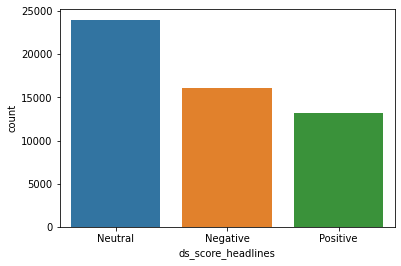

In [70]:
sns.countplot(df_concatened_h['ds_score_headlines'])

**Observation:**
* Headlines contains approximately:
  * 14000 positive statment
  * 16000 negative statment
  * 24000 neutral statment

**Create a pie digram on headline score column**

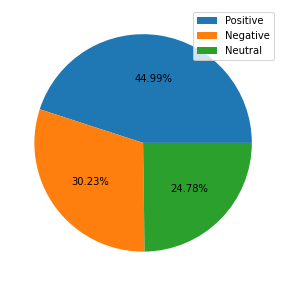

In [71]:
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_h['ds_score_headlines'].value_counts(normalize = True), autopct='%.2f%%')
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying chart
plt.show()

**Observation:**
* Headlines contains:
  * 24.8% positive statments
  * 30.3% negtive statements
  * 44.9% neutral statments

### **Spliting in Independent and Dependent Features**

In [72]:
X = df_concatened_h['Headlines']
y = df_concatened_h['ds_score_headlines']

### **Train test split**
* Split the dataset  into test and train 
* 90% train , 10% test and random state 212

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

## **Modeling on headlines**

In [74]:
'''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),xg.XGBClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
8 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}

map_keys = list(models.keys())

In [75]:
def get_model_building_technique_name(num):
  if num == 1:
    return 'LinearSVC'
  if num == 2:
    return 'LogisticRegression'
  if num == 3:
    return 'MultinomialNB'
  if num == 4:
    return 'BernoulliNB'
  if num == 5:
    return 'GradientBoostingClassifier'
  if num == 6:
    return 'XGBClassifier'
  if num == 7:
    return 'DecisionTreeClassifier'
  if num == 8:
    return 'KNeighborsClassifier'
  return ''
     

In [76]:
results = [];
for key_index in range(len(map_keys)):
  try:
    key = map_keys[key_index]
    model = models[key]
    print(key)
    model.fit(X_train, y_train)

    '''Test Accuracy'''
    y_pred = model.predict(X_test)

    Accuracy_Test = accuracy_score(y_test, y_pred)
    conf_mat_Test = confusion_matrix(y_test, y_pred)
    true_positive_Test = conf_mat_Test[0][0]
    false_positive_Test = conf_mat_Test[0][1]
    false_negative_Test = conf_mat_Test[1][0]
    true_negative__Test = conf_mat_Test[1][1]
    Precision_Test = true_positive_Test /(true_positive_Test + false_positive_Test)
    Recall_Test = true_positive_Test/(true_positive_Test + false_negative_Test)
    F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
    # AUC_Test = roc_auc_score(y_test, y_pred)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train = accuracy_score(y_train, y_pred_train)
    conf_mat_Train = confusion_matrix(y_train, y_pred_train)
    true_positive_Train = conf_mat_Train[0][0]
    false_positive_Train = conf_mat_Train[0][1]
    false_negative_Train = conf_mat_Train[1][0]
    true_negative__Train = conf_mat_Train[1][1]
    Precision_Train = true_positive_Train /(true_positive_Train + false_positive_Train)
    Recall_Train = true_positive_Train/(true_positive_Train + false_negative_Train)
    F1_Score_Train = 2*(Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
    # AUC_Train = roc_auc_score(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test, 
        'F1_Score_Test' : F1_Score_Test, 
        # 'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train, 
        'F1_Score_Train' : F1_Score_Train 
        # 'AUC_Train' : AUC_Train
        })
  except:
    print('Error')

1
2
3
4
5
6
7
8


In [77]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.971305,0.980557,0.996050,0.988243,0.989330,0.996589,0.995965,0.996277,0.008034
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.932858,0.922324,0.995070,0.957317,0.962674,0.957902,0.996266,0.976707,0.019390
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.839460,0.871979,0.961123,0.914384,0.907780,0.935338,0.978988,0.956666,0.042282
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.886159,0.958051,0.920078,0.938681,0.936915,0.982733,0.951118,0.966667,0.027986
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.792386,0.654557,0.996982,0.790271,0.804597,0.668318,0.997536,0.800395,0.010124
5,XGBClassifier,"(CountVectorizer(), TfidfTransformer(), XGBCla...",0.753938,0.579224,0.996606,0.732640,0.763729,0.592407,0.997712,0.743406,0.010765
6,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.946174,0.984942,0.994471,0.989684,1.000000,1.000000,1.000000,1.000000,0.010316
7,KNeighborsClassifier,"(CountVectorizer(), TfidfTransformer(), KNeigh...",0.605026,0.650266,0.667577,0.658808,0.749245,0.795404,0.811792,0.803515,0.144707


In [78]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_h.sav', 'wb') as best_model_pickle:
 pickle.dump(Best_Model_Name, best_model_pickle)

### **Working with test dataset**

**Perforn the prediction on the test dataset**

In [79]:
best_model_h = pickle.load(open('financial_news_model_h.sav', 'rb'))
result = best_model_h.predict(X_test)
pd.DataFrame(result)

,0
0,Positive
1,Positive
2,Negative
3,Neutral
4,Negative
...,...
5327,Neutral
5328,Negative
5329,Positive
5330,Neutral


# **Prediction**

* You can check the result on real time news headlines
* Here i have used two fiancial news headlines and predicted its sentiment
* You can try more 

In [80]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = best_model_h.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [81]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = best_model_h.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# **Conclusion**

* We learn about NLTK and classification ML model, sentiment analysis in this assigment.
* We conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate


#Congratulation for completing the assignment.


You have learned a lot while doing this assignment.